<a href="https://colab.research.google.com/github/bianquini/HeartDisease-DataMining/blob/master/pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/bianquini/HeartDisease-DataMining/master/heart.csv')


---
### Limpeza de Dados

Como o conjunto de dados não possui dados faltantes não foi necessário a realização de procedimentos de limpeza.

In [0]:
dataFrame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

---
### Discretização de dados por Mapeamento direto

Com base no conhecimento do dominio (informação disponibilizada na pagina do Dataset) foi possivel realizar a transformação de dados continuos em discretos ( sex, fbs, e exang). Também foi possivel transformar a classe escolhida para a predição em 'healthy' e 'unhealthy' com o conhecimento do dominio.

  Mapeamento direto das colunas: 

*   sex
*   fbs
*   exang

*   Target







In [0]:
to_replaceSex = {
    0 : 'male',
    1 : 'female'
}

to_replaceTorF = {
    0 : 'false',
    1 : 'true'
}

to_replaceClass = {
    0 : 'healthy',
    1 : 'unhealthy'
}

dataFrame['sex'] = dataFrame.sex.replace(to_replace=to_replaceSex)
dataFrame['fbs'] = dataFrame.fbs.replace(to_replace=to_replaceTorF)
dataFrame['exang'] = dataFrame.exang.replace(to_replace=to_replaceTorF)
dataFrame['target'] = dataFrame.target.replace(to_replace=to_replaceClass)


dataFrame



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,true,0,150,false,2.3,0,0,1,unhealthy
1,37,female,2,130,250,false,1,187,false,3.5,0,0,2,unhealthy
2,41,male,1,130,204,false,0,172,false,1.4,2,0,2,unhealthy
3,56,female,1,120,236,false,1,178,false,0.8,2,0,2,unhealthy
4,57,male,0,120,354,false,1,163,true,0.6,2,0,2,unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,140,241,false,1,123,true,0.2,1,0,3,healthy
299,45,female,3,110,264,false,1,132,false,1.2,1,0,3,healthy
300,68,female,0,144,193,true,1,141,false,3.4,1,2,3,healthy
301,57,female,0,130,131,false,1,115,true,1.2,1,1,3,healthy


### Discretização por split point

In [0]:
dataFrame.loc[:,('cp0')] = dataFrame['cp'].apply(lambda x : x == 0).values
dataFrame.loc[:,('cp1')] = dataFrame['cp'].apply(lambda x : x == 1).values
dataFrame.loc[:,('cp2')] = dataFrame['cp'].apply(lambda x : x == 2).values
dataFrame.loc[:,('cp3')] = dataFrame['cp'].apply(lambda x : x == 3).values


dataFrame.loc[:,('ca0')] = dataFrame['ca'].apply(lambda x : x == 0).values
dataFrame.loc[:,('ca1')] = dataFrame['ca'].apply(lambda x : x == 1).values
dataFrame.loc[:,('ca2')] = dataFrame['ca'].apply(lambda x : x == 2).values
dataFrame.loc[:,('ca3')] = dataFrame['ca'].apply(lambda x : x == 3).values
dataFrame.loc[:,('ca4')] = dataFrame['ca'].apply(lambda x : x == 4).values


dataFrame.loc[:,('thal0')] = dataFrame['thal'].apply(lambda x : x == 0).values
dataFrame.loc[:,('thal1')] = dataFrame['thal'].apply(lambda x : x == 1).values
dataFrame.loc[:,('thal2')] = dataFrame['thal'].apply(lambda x : x == 2).values
dataFrame.loc[:,('thal3')] = dataFrame['thal'].apply(lambda x : x == 3).values

dataFrame.loc[:,('restecg0')] = dataFrame['restecg'].apply(lambda x : x == 0).values
dataFrame.loc[:,('restecg1')] = dataFrame['restecg'].apply(lambda x : x == 1).values
dataFrame.loc[:,('restecg2')] = dataFrame['restecg'].apply(lambda x : x == 2).values

dataFrame.loc[:,('slope0')] = dataFrame['slope'].apply(lambda x : x == 0).values
dataFrame.loc[:,('slope1')] = dataFrame['slope'].apply(lambda x : x == 1).values
dataFrame.loc[:,('slope2')] = dataFrame['slope'].apply(lambda x : x == 2).values


dataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp0,cp1,cp2,cp3,ca0,ca1,ca2,ca3,ca4,thal0,thal1,thal2,thal3,restecg0,restecg1,restecg2,slope0,slope1,slope2
0,63,female,3,145,233,true,0,150,false,2.3,0,0,1,unhealthy,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
1,37,female,2,130,250,false,1,187,false,3.5,0,0,2,unhealthy,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False
2,41,male,1,130,204,false,0,172,false,1.4,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
3,56,female,1,120,236,false,1,178,false,0.8,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,57,male,0,120,354,false,1,163,true,0.6,2,0,2,unhealthy,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,140,241,false,1,123,true,0.2,1,0,3,healthy,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
299,45,female,3,110,264,false,1,132,false,1.2,1,0,3,healthy,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
300,68,female,0,144,193,true,1,141,false,3.4,1,2,3,healthy,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False
301,57,female,0,130,131,false,1,115,true,1.2,1,1,3,healthy,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False


---
### Normalização

In [0]:
def normalizacao_linear(x): 
    return (x - np.min(x)) / (np.max(x) - np.min(x));

In [0]:
dataFrame['chol'] = normalizacao_linear( dataFrame['chol'] )

frequencia = dataFrame['thalach']

dataFrame['trestbps'] = normalizacao_linear( dataFrame['trestbps'])

dataFrame['thalach'] = normalizacao_linear( dataFrame['thalach'])

dataFrame['oldpeak'] = normalizacao_linear( dataFrame['oldpeak'])

dataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp0,cp1,cp2,cp3,ca0,ca1,ca2,ca3,ca4,thal0,thal1,thal2,thal3,restecg0,restecg1,restecg2,slope0,slope1,slope2
0,63,female,3,0.481132,0.244292,true,0,0.603053,false,0.370968,0,0,1,unhealthy,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
1,37,female,2,0.339623,0.283105,false,1,0.885496,false,0.564516,0,0,2,unhealthy,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False
2,41,male,1,0.339623,0.178082,false,0,0.770992,false,0.225806,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
3,56,female,1,0.245283,0.251142,false,1,0.816794,false,0.129032,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,57,male,0,0.245283,0.520548,false,1,0.702290,true,0.096774,2,0,2,unhealthy,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,0.433962,0.262557,false,1,0.396947,true,0.032258,1,0,3,healthy,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
299,45,female,3,0.150943,0.315068,false,1,0.465649,false,0.193548,1,0,3,healthy,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
300,68,female,0,0.471698,0.152968,true,1,0.534351,false,0.548387,1,2,3,healthy,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False
301,57,female,0,0.339623,0.011416,false,1,0.335878,true,0.193548,1,1,3,healthy,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False


Como existe uma grande diferença de escala entre alguns dados, foi necessário realizar normalização nas seguintes colunas: 

* chol;
* trestbps;
* thalach;
* oldpeak.




### Descrição dos dados

In [0]:
dataFrame['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [0]:
dataFrame['sex'].unique()

array(['female', 'male'], dtype=object)

In [0]:
dataFrame['cp'].unique()

array([3, 2, 1, 0])

In [0]:
dataFrame['trestbps'].unique()

array([0.48113208, 0.33962264, 0.24528302, 0.43396226, 0.73584906,
       0.52830189, 0.1509434 , 0.38679245, 0.62264151, 0.10377358,
       0.29245283, 0.45283019, 0.5754717 , 0.09433962, 0.41509434,
       0.32075472, 0.13207547, 0.37735849, 0.26415094, 0.19811321,
       0.22641509, 0.05660377, 0.28301887, 0.        , 0.16981132,
       0.0754717 , 0.54716981, 0.06603774, 0.35849057, 0.50943396,
       0.79245283, 0.33018868, 0.81132075, 0.39622642, 0.30188679,
       0.11320755, 0.58490566, 0.71698113, 0.49056604, 0.21698113,
       1.        , 0.66981132, 0.75471698, 0.9245283 , 0.47169811,
       0.27358491, 0.56603774, 0.18867925, 0.66037736])

In [0]:
dataFrame['chol'].unique()

array([0.24429224, 0.28310502, 0.17808219, 0.25114155, 0.52054795,
       0.15068493, 0.38356164, 0.31278539, 0.16666667, 0.09589041,
       0.25799087, 0.34018265, 0.3196347 , 0.19406393, 0.35844749,
       0.21232877, 0.48858447, 0.2283105 , 0.27625571, 0.24657534,
       0.26712329, 0.40182648, 0.19634703, 0.11187215, 0.66438356,
       0.16210046, 0.16438356, 0.11643836, 0.33561644, 0.19863014,
       0.40639269, 0.24200913, 0.32648402, 0.53424658, 0.41552511,
       0.2716895 , 0.18721461, 0.31506849, 0.44520548, 0.4543379 ,
       0.24885845, 0.29908676, 0.20547945, 0.29680365, 0.23972603,
       0.03424658, 0.28767123, 0.17123288, 0.21917808, 0.30593607,
       0.12785388, 0.40410959, 0.3173516 , 0.41780822, 0.1369863 ,
       0.17579909, 0.13013699, 0.21461187, 0.18949772, 0.30136986,
       0.23059361, 0.30821918, 0.21689498, 0.1803653 , 0.26027397,
       0.43835616, 0.39269406, 1.        , 0.34474886, 0.20091324,
       0.27853881, 0.29452055, 0.18493151, 0.22146119, 0.36986

In [0]:
dataFrame['fbs'].unique()

array(['true', 'false'], dtype=object)

In [0]:
dataFrame['restecg'].unique()

array([0, 1, 2])

In [0]:
dataFrame['thalach'].unique()

array([0.60305344, 0.88549618, 0.77099237, 0.81679389, 0.70229008,
       0.58778626, 0.6259542 , 0.77862595, 0.69465649, 0.78625954,
       0.67938931, 0.51908397, 0.76335878, 0.55725191, 0.66412214,
       0.32824427, 0.61068702, 0.6870229 , 0.82442748, 0.50381679,
       0.65648855, 0.39694656, 0.61832061, 0.74045802, 0.52671756,
       0.89312977, 0.41221374, 0.75572519, 0.71755725, 0.54198473,
       0.83206107, 0.54961832, 0.84732824, 0.64885496, 0.33587786,
       0.59541985, 0.57251908, 0.79389313, 0.8778626 , 0.87022901,
       0.67175573, 0.45038168, 0.90839695, 0.46564885, 0.58015267,
       0.63358779, 1.        , 0.72519084, 0.70992366, 0.86259542,
       0.38931298, 0.7480916 , 0.51145038, 0.30534351, 0.5648855 ,
       0.9389313 , 0.45801527, 0.47328244, 0.64122137, 0.73282443,
       0.92366412, 0.38167939, 0.19083969, 0.41984733, 0.25954198,
       0.83969466, 0.34351145, 0.28244275, 0.44274809, 0.3740458 ,
       0.3129771 , 0.4351145 , 0.29007634, 0.32061069, 0.21374

In [0]:
dataFrame['exang'].unique()

array(['false', 'true'], dtype=object)

In [0]:
dataFrame['oldpeak'].unique()

array([0.37096774, 0.56451613, 0.22580645, 0.12903226, 0.09677419,
       0.06451613, 0.20967742, 0.        , 0.08064516, 0.25806452,
       0.19354839, 0.03225806, 0.29032258, 0.16129032, 0.41935484,
       0.24193548, 0.48387097, 0.38709677, 0.01612903, 0.30645161,
       0.67741935, 0.17741935, 0.32258065, 0.11290323, 0.0483871 ,
       0.14516129, 0.58064516, 0.5       , 0.51612903, 0.40322581,
       0.35483871, 0.4516129 , 0.5483871 , 1.        , 0.64516129,
       0.90322581, 0.46774194, 0.33870968, 0.61290323, 0.70967742])

In [0]:
dataFrame['slope'].unique()

array([0, 2, 1])

In [0]:
dataFrame['ca'].unique()

array([0, 2, 1, 3, 4])

In [0]:
dataFrame['thal'].unique()

array([1, 2, 3, 0])

In [0]:
dataFrame['target'].unique()

array(['unhealthy', 'healthy'], dtype=object)

### Visualização de Dados

Visualização em relação a classe (target)

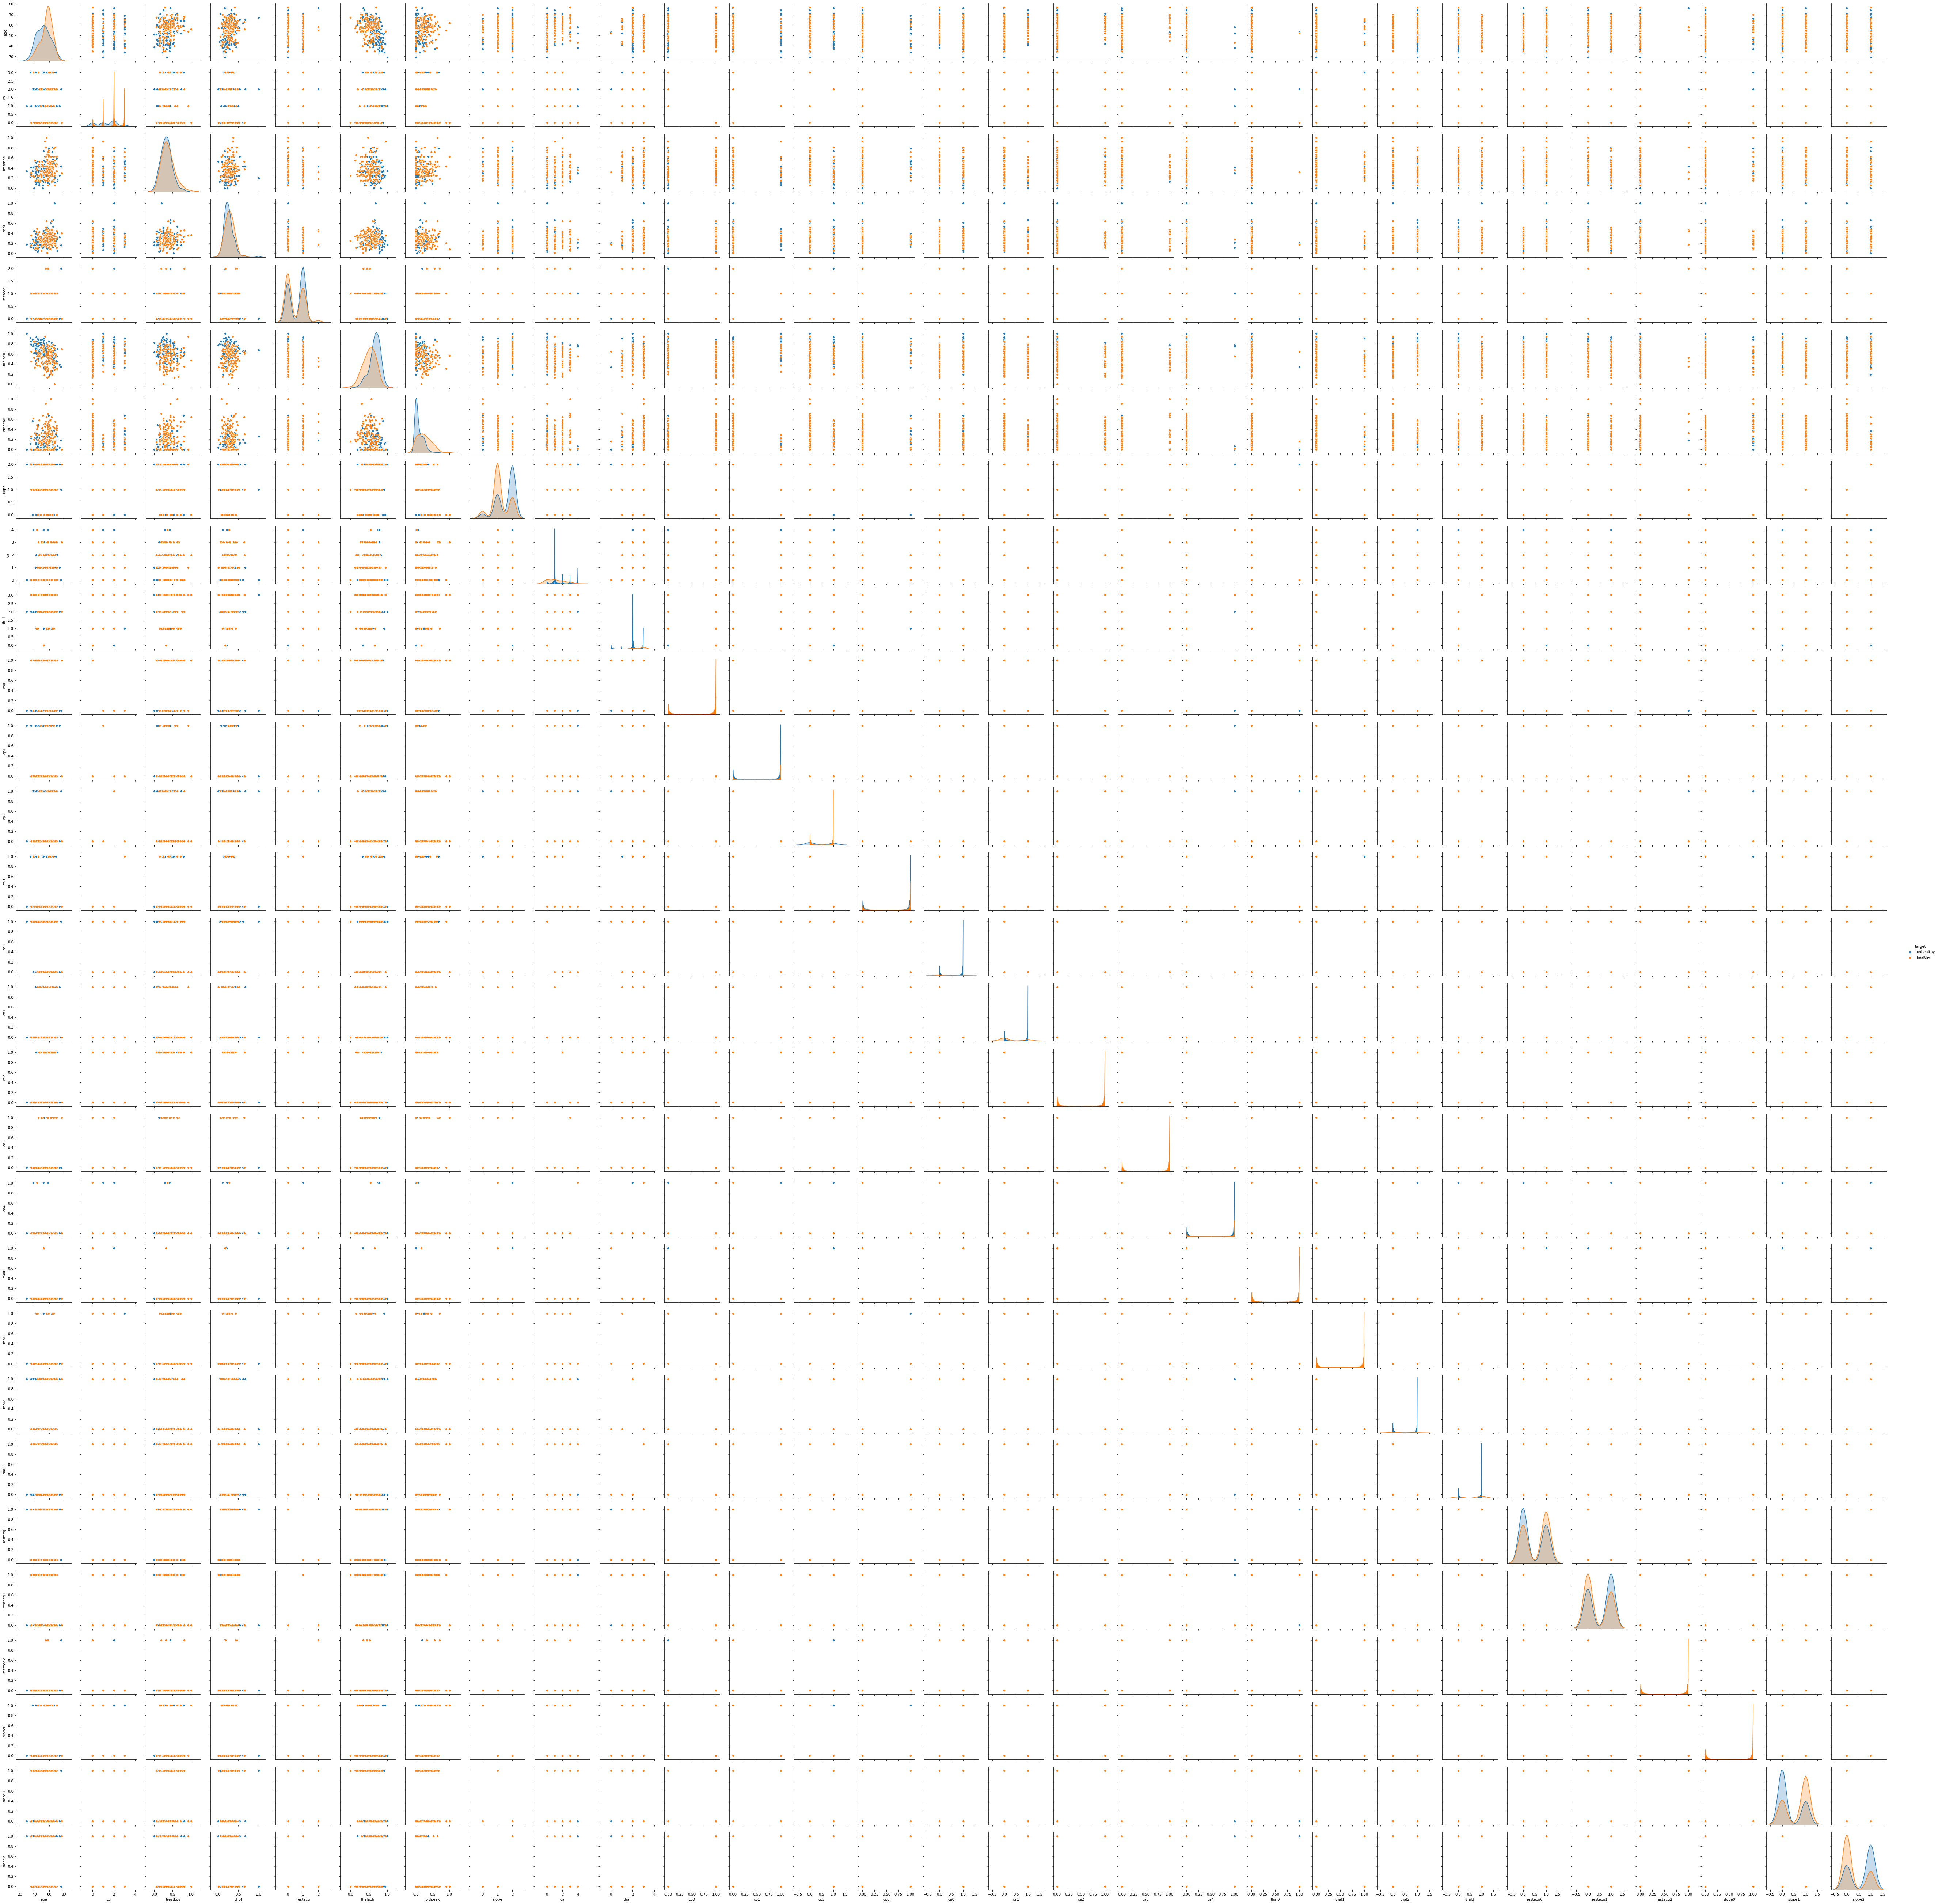

In [0]:
sns.pairplot(dataFrame, hue="target")

Relação entre sexo e a idade das amostras, separados pela classe (target)

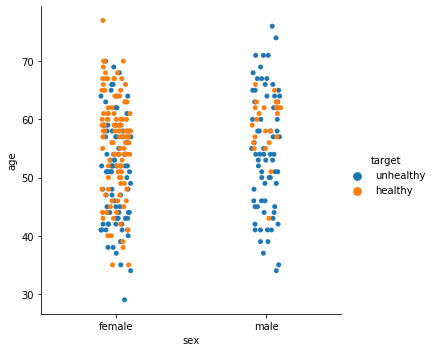

In [0]:
sns.catplot(x="sex", y="age", hue="target", data=dataFrame);

Contagem de pessoas doentes e saudáveis, separados pelo sexo

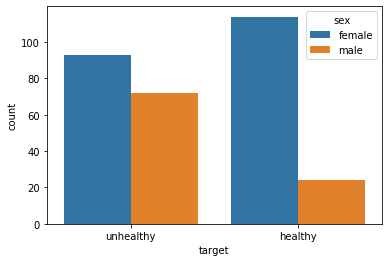

In [0]:
sns.countplot(x='target',hue='sex',data=dataFrame)

### Exportação de dados

In [0]:
from google.colab import files

dataFrame.to_csv('DS pré-processado.csv')
#files.download('DS pré-processado.csv')